**Group:**

1. João Guilherme Monteiro de Souza Filho (jgmsf);
2. Mateus Elias de Andrade Pereira (meap);
3. Nathalia Fernanda de Araújo Barbosa (nfab);
4. Sarah Leitão Melo (slm2).

## Abstract

Our project objective is to use SVIRS epidemic model to project two diffenrents situations: one is how will be the COVID-19 situation in Pernambuco if the vaccines against the COVID-19 doesn't exist and the other will be a real projection of how will be the situation of COVID-19 in Pernambuco after considering all the vaccinnes that we actually have. Our idea is to compare these two projections to measure somehow the impact of the vaccines in the Pernambucos' COVID-19 pandemic.

## Introduction and objectives

The covid is a disease origined from Wuhan, China. It has its first victims in late 2019 when it still labeled as Acute Respiratory Distress Syndrome. As a result of its high infectious rate and mortality rate, it started to spread otherwise and need it a global effort to fight it. Scientists around the world jointed efforts in an unprecedented international collaboration to find a vaccine or cure.

The covid pandemic changed the world for almost 2 years already. The way we work and live in society needed to be adapted control the spreading of the virus. Besides, many lifes have been lost due the disease, impacting not only socially but also reducing the life expectancy in some countries.

The vaccine against COVID-19 was developed in record time. In Pernambuco, the place where we are analysing, the vaccine took a bit longer to start being distributed, it only started by January 2021. We're aiming in projection two differnt situations, one is how will be the COVID-19 situation in Pernambuco after August of 2022 if the vaccines against the COVID-19 doesn't exist, and the other will be a real projection of how how will be the situation of COVID-19 in Pernambuco after August of 2022 considering all the vaccinnes that we actually have. After these two projections, we're going to analyse and report the impact of the vaccines on the COVID-19 situation in Pernambuco.

Even though this vaccines have already saved millions of lifes worldwide, some organizations still insists in an unscientific approach, spreading fake news and manipulating data to spread fear in the general population and influnce some governements. Therefore, our main objective is to show what might have happen in a world without the fast development of vaccines, and consequently spread the danger this organizations are putting our community through.

## Mind Map

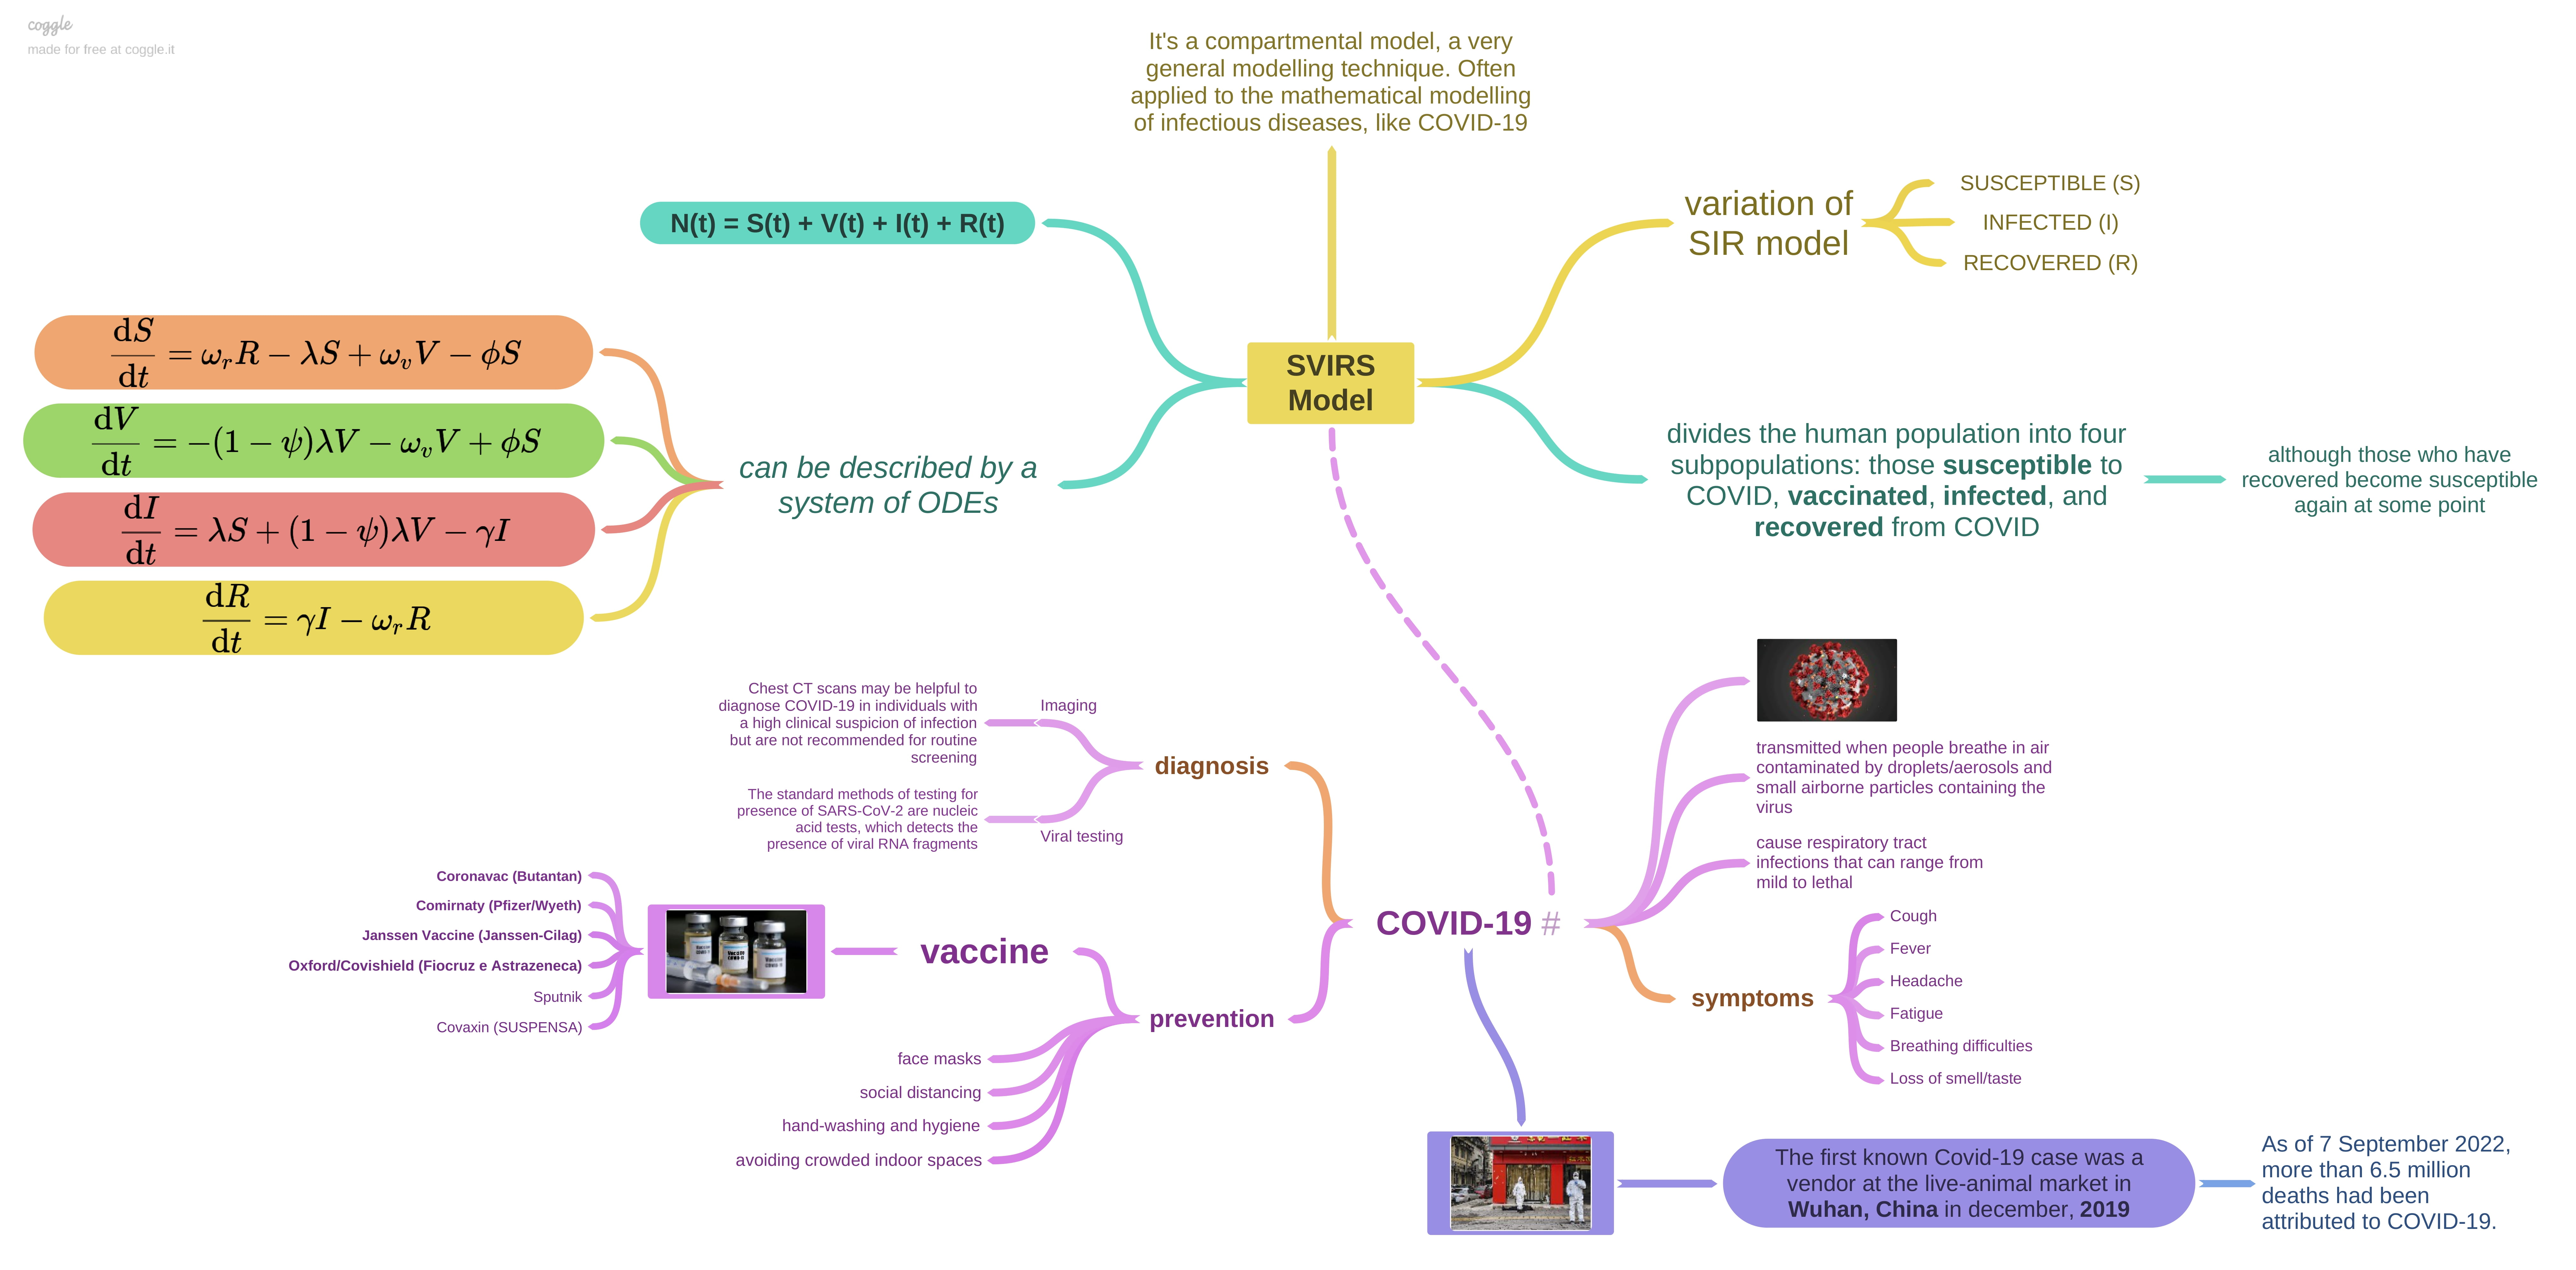

In [ ]:
URL = "https://raw.githubusercontent.com/SarahLMelo/Covid19VaccineAnalysis/main/Primeira%20Parte%20(P1)/Mind%20Map.jpg?token=GHSAT0AAAAAABWBDR4R3A2KVUIRAPUZWXOCYYZHJ6A"
response = requests.get(URL)
open("Mind Map.jpg", "wb").write(response.content)

from IPython.display import Image
Image('/content/Mind Map.jpg')

## Model

We're going to use the **SVIRS** model to do our two projections described in the introduction section.

#### SVIRS model


This model is a variant of **SIR's** model that includes a new group to describe the population: the vaccinated. The **SVIRS** model also consider the possiblity of reinfection, this means that the acquired immunity after being vaccinated or after being recovered from the disease is not lifelong and, for this reason, the person can return to the succetibles group and being infected again.

In **SVIRS** model, the total population is divided into three groups:

* **Susceptibles $S(t)$**: individuals that can be part of infected group. 
* **Vaccinated $V(t)$**: individuals that are vaccinated with two doses and because of that had less chance to beeing infected.
* **Infected $I(t)$**: individuals infected with the disease.
* **Recovered $R(t)$**: individuals who were infected but now are recovered, having a period of immunity before becoming susceptible again. This is one of the differences from the **SVIRS** model to the SIR. In the SIR, the recovered have lifelong immunity and cannot become susceptible again.

So the total population is described as:

\begin{align}
N(t) = S(t) + V(t) + I(t) + R(t)
\end{align}

This model is described by the following ODEs:

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = \omega_rR - λS + \omega_vV - \phi S &\\ \\
\frac{{\rm d}V}{{\rm d}t} & = -(1 - ψ)λV - \omega_vV + \phi S \\ \\
\frac{{\rm d}I}{{\rm d}t} & = λS + (1 - ψ)λV - γI \\ \\
\frac{{\rm d}R}{{\rm d}t} & = γI - ω_rR
\end{align}

Where:

1. $λ$ represents the infection rate per person and it is defined by $λ = \frac{βI}{N}$.
2. $β$ represents the probability of transmitting the disease between an susceptible and a infected individual.
3. $γ$ represents the recorvery rate and it is determined by $γ = \frac{1}{D}$ where $D$ is the average duration of inffection in days.
4. $\omega_r$ represents the rate that a recovered individual comeback to susceptibles' group because of immunity loss.
5. $\omega_v$ represents the rate that vaccinated individuals comeback do succeptibles' group because of immunity loss.
6. $\phi$ represents the vaccination rate.
7. $ψ$ represents the vaccine efficieny rate. 


##### Parameters


To analyse each modeled scenario, we must adjust the model parameters. It is known that the vaccine efficiency vary according to the laboratory (CoronaVac, AstraZeneca, Pfizer and Janssen). We will consider a weighted average of these different coronavirus vaccinnes, in order to have a better precision. Using the governement of the state of Pernambuco and the vaccine efficiency by laboratory,we have the following analysis:

###### Average Efficiency Calculation → $ψ$

Coronavac → 4.481.720 distributed doses → $P_c = 31,25\%$

> Efficiency: $\psi_c = 67,4\%$

Astrazeneca → 4.707.170 distributed doses → $P_a = 32,83\%$

> Efficiency: $\psi_a = 76\%$

Pfizer → 4.977.180 distributed doses → $P_p = 34,71\%$

> Efficiency: $\psi_p = 83,5\%$

Janssen → 173.810 distributed doses → $P_j = 1,21\%$

> Efficiency: $\psi_j = 66\%$

**Total of distributed doses → 14.339.880**

Where $P$ é a porcentagem de doses no total de doses e  é a eficácia da vacina de determinado laboratório.

Where $P$ is the percentage

Thus, the average effectiveness of vaccines is given by:

\begin{align}
ψ = \frac{ψ_cP_c + ψ_aP_a + ψ_pP_p + ψ_jP_j}{100\%}
\end{align}

\begin{align}
ψ = \frac{0,674(31,25\%) + 0,76(32,83\%) + 0,835(34,71\%) + 0,66(1,21\%)}{100\%} = 0,7579475
\end{align}

\begin{align}
ψ = 0,76
\end{align}

###### Calculation of $ω_v$, $\omega_r$ e $\phi$

To find the immunity loss rates (by the vaccination and by the disease recover) and the vaccination, we transformed the annual or monthly rates in daily rates.

It is estimated that immunity from vaccination drops $\omega_v$ 50% per year, so we calculate that this rate is 0.1170% per day.

The immunity acquired after recovery from the COVID $\omega_r$ drops 10% every 90 days, so we calculate that this rate is 0.1897% per day.

To calculate the daily vaccination rate $\phi$, we consider that this vaccination was done evenly during the days, so, knowing the number of vaccinated on 31/10/2021 and the day of the vaccination start, we calculate that this rate is 0.2627% per day.

###### Calculation of $β$

The disease transmission rate $β$ can be calculated from the spread rate of COVID-19 in the population $r$ and the number of susceptible people $S$ as follows:

\begin{align}
β = \frac{r}{S}
\end{align}

The spread rate $r$ was found from the analysis of the spread rates of the disease in reality considering the waves that occurred in the number of cases over time.

## Results and discussion



Inicially, we are going to analyze and plot the real data about the COVID-19 in the state of Pernambuco by using graphics, in order to use these information to compare posteriously with our model results.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import requests
from scipy.integrate import odeint

After importing the cell above, we alread have the libs that we are going to need. Now, we are going to download our dataset. One of them is the data related to COVID-19 in Pernambuco, and the other one has the data about the vaccination against COVID-19 in the state.

In [ ]:
# In the code below we will download our datasets. One contains data on COVID-19 in PE and the other contains data on vaccination against COVID-19 in PE
URL = "https://raw.githubusercontent.com/SarahLMelo/Covid19VaccineAnalysis/main/covid19_dataset.csv?token=GHSAT0AAAAAABWBDR4RUX47UVKX77MP2X5UYYZIUUA"
response = requests.get(URL)
open("covid19_dataset.csv", "wb").write(response.content)

URL = "https://raw.githubusercontent.com/SarahLMelo/Covid19VaccineAnalysis/main/vaccines_dataset.csv?token=GHSAT0AAAAAABWBDR4QEEAMIC6QDBT2K3NAYYZIVCA"
response = requests.get(URL)
open("vaccines_dataset.csv", "wb").write(response.content)

# Now we will extract the data from our datasets (which are .CSV files) and store them in Pandas DataFrames
covid19_dataset = pd.read_csv('/content/covid19_dataset.csv', sep=',', on_bad_lines='skip')
vaccines_dataset = pd.read_csv('/content/vaccines_dataset.csv', sep=',', on_bad_lines='skip')

These are the data about COVID-19 in Pernambuco:

In [ ]:
covid19_dataset.head() 

,dt_referencia,dt_atualizacao,confirmados,obitos,tx_obitos,recuperados,tx_recuperados,isolamento,tx_isolamento,enfermaria,tx_enfermaria,uti,tx_uti,testes_novos,testes_acumulados,tx_testes,leitos_uti,tx_oc_uti,leitos_enf,tc_oc_enf
0,2020-04-03,NaN,176,14,0.080,23,0.131,87,0.569,34,0.222,18,0.102,0,0,0,0,0.0,0,0.0
1,2020-04-04,NaN,201,21,0.104,25,0.124,87,0.494,49,0.278,19,0.094,0,0,0,0,0.0,0,0.0
2,2020-04-05,NaN,223,30,0.134,25,0.112,101,0.510,44,0.222,23,0.103,0,0,0,0,0.0,0,0.0
3,2020-04-06,NaN,352,34,0.097,32,0.091,166,0.519,94,0.294,26,0.074,0,0,0,0,0.0,0,0.0
4,2020-04-07,NaN,401,46,0.115,32,0.080,189,0.512,110,0.298,24,0.060,0,0,0,0,0.0,0,0.0


These are the data about the vaccination against COVID-19 in Pernambuco:

In [ ]:
vaccines_dataset.tail()

,data,primeira_dose,segunda_dose_mais_unica,dose_de_reforco
15,22/04/2022,8163523,7157934,3326161
16,22/05/2022,8235967,7331420,3646666
17,22/06/2022,8270902,7440733,3929647
18,22/07/2022,8357608,7598411,4305978
19,22/08/2022,8428998,7671341,4405921


Firstly, we are going to explore the data about COVID-19 in PE, which are already in a Pandas' dataframe.

Text(0, 0.5, 'Total accumulated of infected')

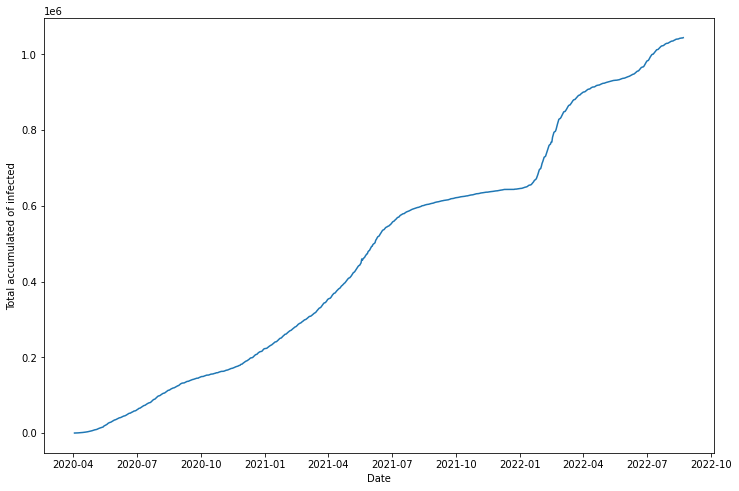

In [ ]:
# We will store in a list the dates referring to each data line of our CSV with data about COVID-19 in PE
dates_covid19_dataset = mdates.datestr2num(covid19_dataset['dt_referencia'].tolist())

# Now let's filter the data about the total accumulated of confirmed cases (total accumulated infected)
totalOfInfecteds = covid19_dataset['confirmados'].tolist()

# Plotting the data (total accumulated of COVID-19 infected between April 2020 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, totalOfInfecteds)
plt.xlabel("Date")
plt.ylabel("Total accumulated of infected")

Text(0, 0.5, 'Total accumulated of deaths')

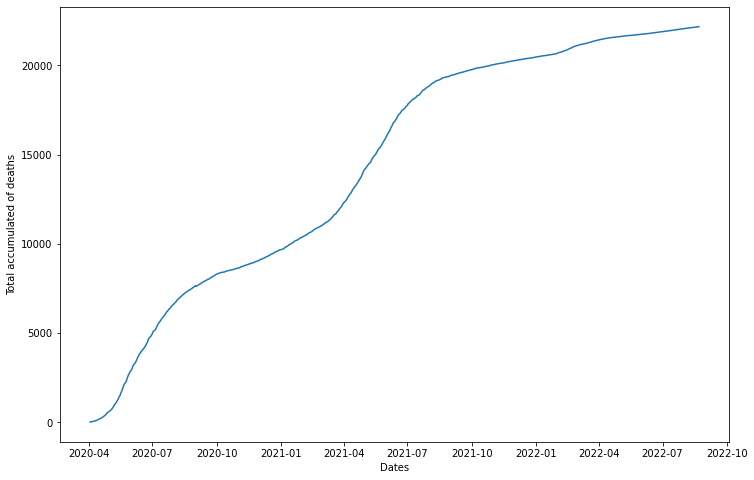

In [ ]:
# Now let's filter the data about the total accumulated of deaths
totalOfDeaths = covid19_dataset['obitos'].tolist()

# Plotting the data (total accumulated of COVID-19 deaths between April 2020 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, totalOfDeaths)
plt.xlabel("Dates")
plt.ylabel("Total accumulated of deaths")

Text(0, 0.5, 'Total of recovereds')

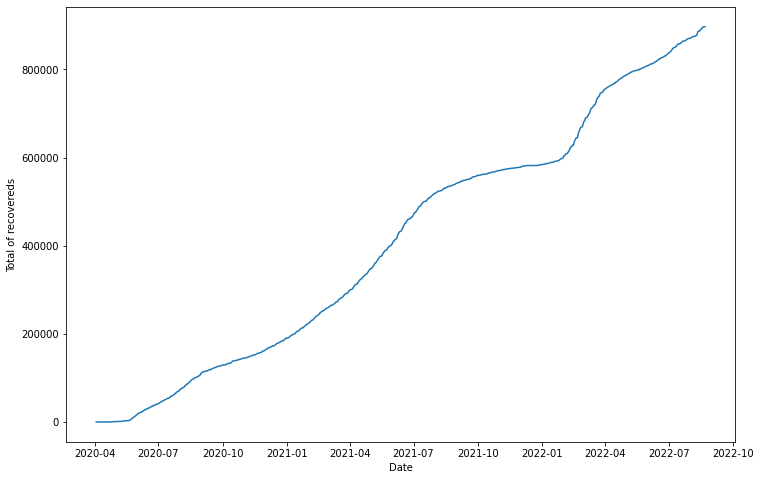

In [ ]:
# Finally, let's filter the total accumulated of recovered
totalOfRecovereds = covid19_dataset['recuperados'].tolist()

# Plotting the data (total accumulated of COVID-19 recovered between April 2020 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, totalOfRecovereds)
plt.xlabel("Date")
plt.ylabel("Total of recovereds")

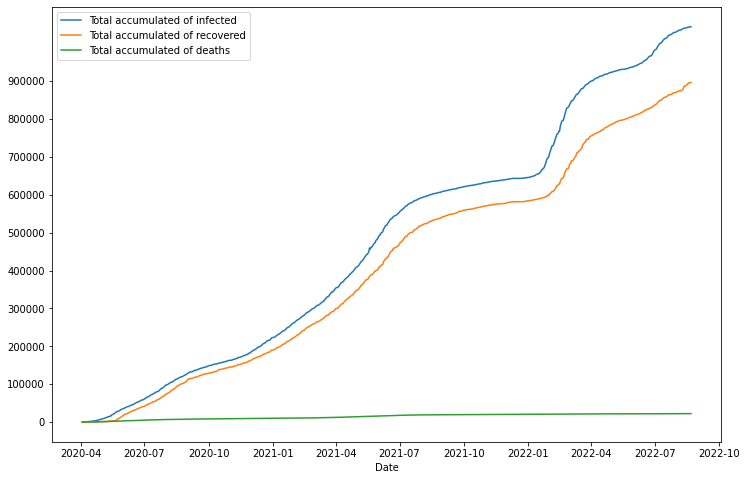

In [ ]:
# Now let's plot a graph containing the total accumulated of infected, recovered and dead
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, totalOfInfecteds, label="Total accumulated of infected")
plt.plot(dates_covid19_dataset, totalOfRecovereds, label="Total accumulated of recovered")
plt.plot(dates_covid19_dataset, totalOfDeaths, label="Total accumulated of deaths")

plt.yticks(range(0,1000000,100000))

plt.xlabel("Date")
plt.legend()

Secondly, we are going to plot and analyze the data about the vaccination against COVID-19 in PE.

Text(0, 0.5, 'Total of first doses applied')

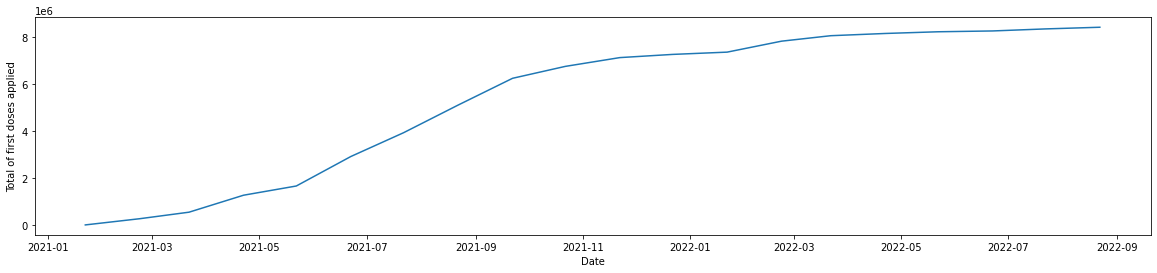

In [ ]:
# We will store in a list the dates referring to each data line of our CSV with data on vaccination against COVID-19 in PE
dates_vaccinated_dataset = mdates.datestr2num(vaccines_dataset['data'].tolist())

# Now let's filter the data about the total of first doses applied
firstDose = vaccines_dataset['primeira_dose'].tolist()

# Plotting the data (total of first doses applied against COVID-19 between January 2021 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(dates_vaccinated_dataset, firstDose)
plt.xlabel("Date")
plt.ylabel("Total of first doses applied")

Text(0, 0.5, 'Total of second doses + single doses applied')

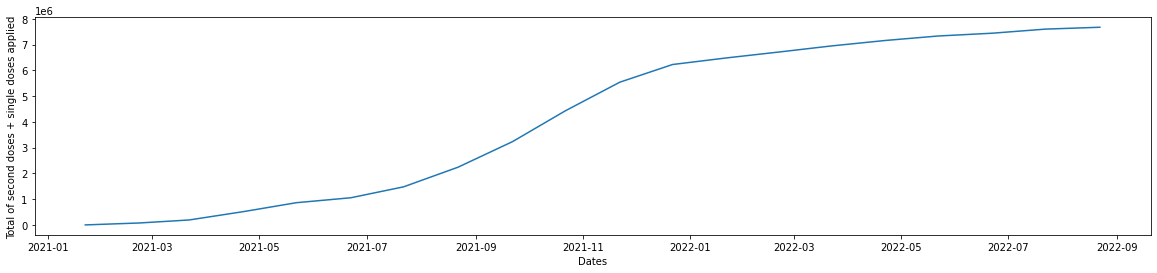

In [ ]:
# Now let's filter the data about the total of second doses + single doses applied
secondDosePlusUnique = vaccines_dataset['segunda_dose_mais_unica'].tolist()

# Plotting the data (total of second doses + single doses applied against COVID-19 between January 2021 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(dates_vaccinated_dataset, secondDosePlusUnique)
plt.xlabel("Dates")
plt.ylabel("Total of second doses + single doses applied")

Text(0, 0.5, 'Total of reinforcement doses applied')

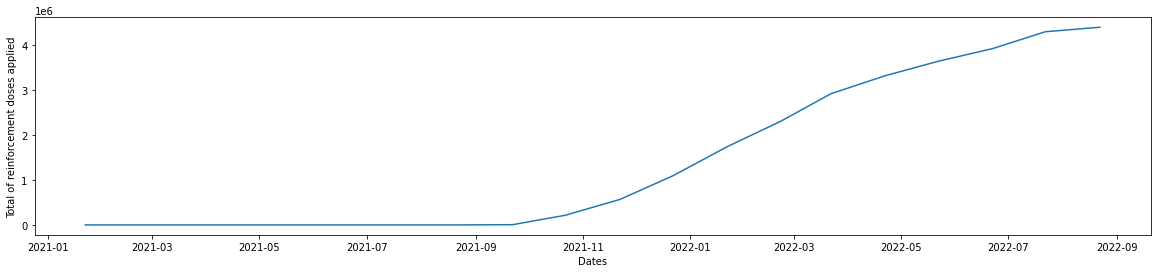

In [ ]:
# Now let's filter the data about the total of booster doses applied 
reinforcementDose = vaccines_dataset['dose_de_reforco'].tolist()

# Plotting the data (total of booster doses applied against COVID-19 between January 2021 and August 2022 in PE)
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(dates_vaccinated_dataset, reinforcementDose)
plt.xlabel("Dates")
plt.ylabel("Total of reinforcement doses applied")

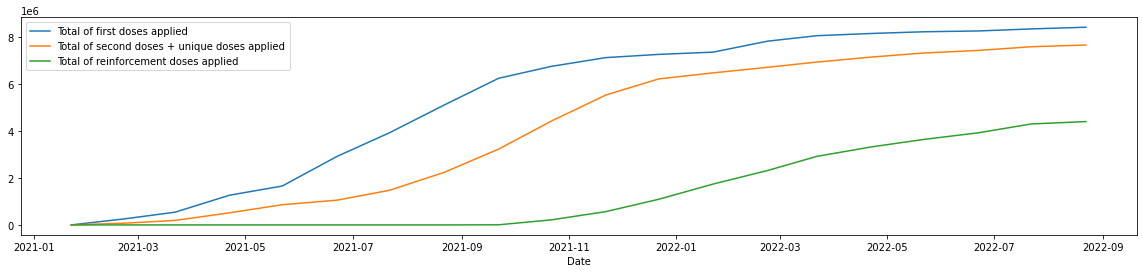

In [ ]:
# Now let's plot a graph containing the total of first doses applied, second doses + single doses applied and booster doses applied
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(dates_vaccinated_dataset, firstDose, label="Total of first doses applied")
plt.plot(dates_vaccinated_dataset, secondDosePlusUnique, label="Total of second doses + unique doses applied")
plt.plot(dates_vaccinated_dataset, reinforcementDose, label="Total of reinforcement doses applied")

plt.xlabel("Date")
plt.legend()

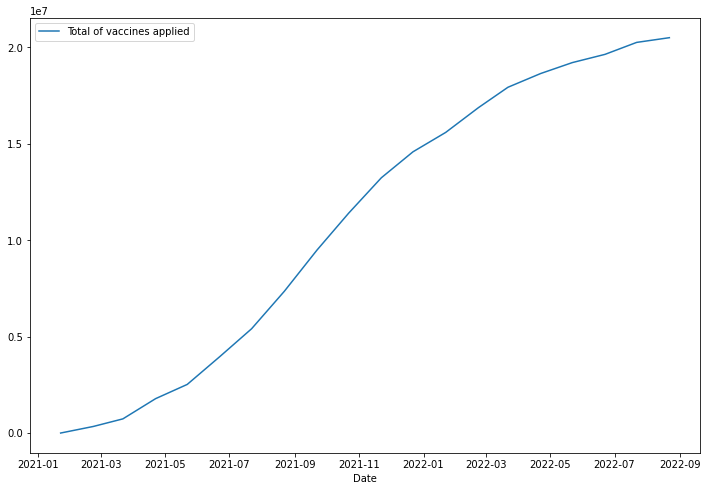

In [ ]:
# Total of vaccines applied against COVID-19 between January 2021 and August 2022 in PE
firsDosePlusReinforcementDose = np.add(firstDose, reinforcementDose)
totalOfVaccines = np.add(secondDosePlusUnique, firsDosePlusReinforcementDose)

fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_vaccinated_dataset, totalOfVaccines, label="Total of vaccines applied")

plt.xlabel("Date")
plt.legend()

### Using SVIRS model

We are using a the odeint function of Python scientific lib called scipy to integrate the system of differential equation in time $dt$ = 1,0/1440. In the studied cases, we considered the recorvery time as $D$ = 15 days. Let's assume this parameter is steady and do not change during time. Besides the parameters explained above, our inicial values are:

\begin{align}
N = 9674793
\end{align}
\begin{align}
V_0 = 0
\end{align}
\begin{align}
I_0 = 14226
\end{align}
\begin{align}
R_0 = 41925
\end{align}
\begin{align}
S_0 = N - I_0 - R_0 - V_0
\end{align}

Now, we are going to apply our model to explain the pandemic behavior and plot some scenarios of COVID-19 in Pernambuco.

In [ ]:
# Defining the initial conditions
N = 9674793
V0, I0, R0 = 0, 14226, 41925
S0 = N - I0 - R0 - V0

omegaV = 0.001170 # Vaccine immunity's drops 50% per year
omegaR = 0.001897 # The immunity of recovered people drops 10% every 90 days

psi = 0.76 # Vaccine effectiveness
phi = 0.002627 # Vaccination rate

D = 15 # Infection lasts 15 days
gamma = 1./D

As our initial conditions are defined, we are now going to define our model **SVIRS** and apply it.

In [ ]:
# SVIRS model

def deriv(y, t, omegaR, omegaV, psi, phi, gamma):
    if t < 219: # until 05/02/2021 there was no vaccination - second dose, so all data related to it are 0
      phi, V, omegaV, psi = 0, 0, 0, 0
    if t < 70: # mid August 2020
      r = 0.069
    elif t < 160: # mid November 2020
      r = 0.06
    elif t < 170: # end of November 2020
      r = 0.13
    elif t < 380: # end of April 2021
      r = 0.069
    else:
      r = 0.053

    S, V, I, R = y
    beta = r/S
    
    lbda = beta

    dSdt = omegaR*R - lbda*S*I + omegaV*V - phi*S
    dVdt = (psi - 1)*lbda*V*I - omegaV*V + phi*S
    dIdt = lbda*S*I + (1 - psi)*lbda*V*I - gamma*I
    dRdt = gamma*I - omegaR*R

    return dSdt, dVdt, dIdt, dRdt

In [ ]:
# Applying the model:
y0 = S0, V0, I0, R0
t = np.linspace(0,len(dates_covid19_dataset),len(dates_covid19_dataset))

ret = odeint(deriv, y0, t, args=(omegaR, omegaV, psi, phi, gamma))
S, V, I, R = ret.T

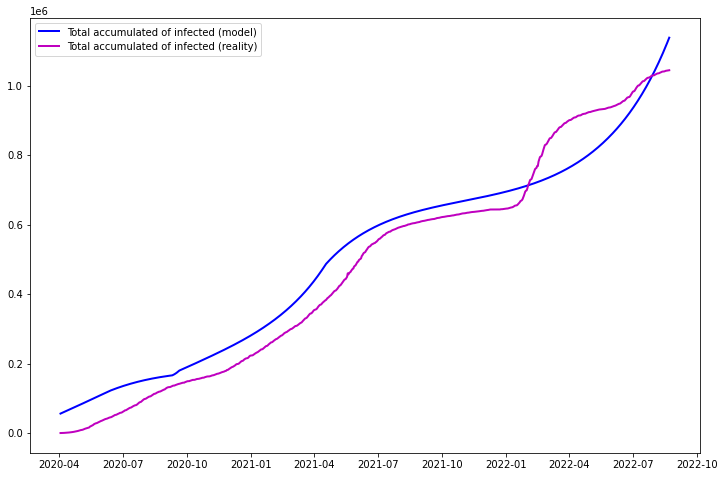

In [ ]:
 # Graphically representing the total accumulated of infected and comparing with reality
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, (I+R),'b', lw=2, label = 'Total accumulated of infected (model)')
plt.plot(dates_covid19_dataset, totalOfInfecteds,'m', lw=2, label = 'Total accumulated of infected (reality)')
plt.legend()
plt.show()

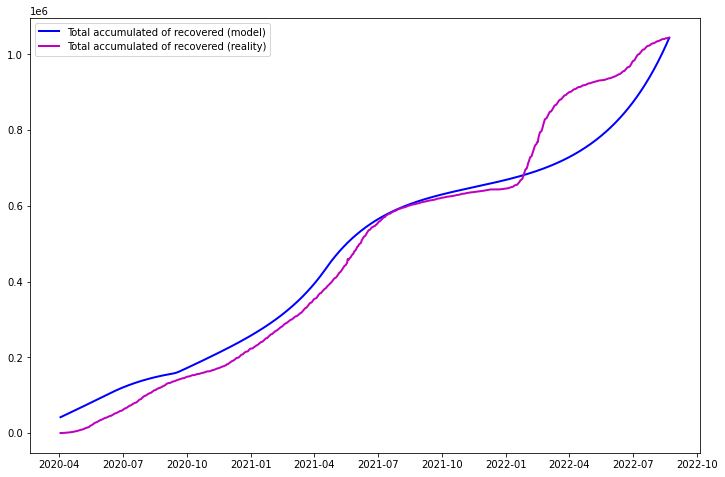

In [ ]:
# Graphically representing the total accumulated of recovered and comparing with reality
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, (R),'b', lw=2, label = 'Total accumulated of recovered (model)')
plt.plot(dates_covid19_dataset, totalOfInfecteds,'m', lw=2, label = 'Total accumulated of recovered (reality)')
plt.legend()
plt.show()

Now we are going to use the **SVIRS** without considering the vaccination, to do it, we created a new variable to store the total accumulated of recovered which have become susceptible again. We'll basically simulate the case in that the vaccines doesn't exists.

In [ ]:
# SVIRS model (not considering vaccination)

X0 = I0 + R0 # I0 -> initial value of total accumulated of infected | R0 -> initial value of total accumulated of recovered | X0 -> Initial value of total accumulated of recovered which have become susceptible again

def deriv(y, t, omegaR, gamma):
    if t < 70: # mid August 2020
      r = 0.069
    elif t < 160: # mid November 2020
      r = 0.06
    elif t < 170: # end of November 2020
      r = 0.13
    elif t < 380: # end of April 2021
      r = 0.069
    else:
      r = 0.053

    S, I, R, X = y # X is the variable that store the total accumulated recovered which have become susceptible
    beta = r/S
    
    lbda = beta

    dSdt = omegaR*R - lbda*S*I
    dIdt = lbda*S*I - gamma*I
    dRdt = gamma*I - omegaR*R
    dXdt = omegaR*R

    return dSdt, dIdt, dRdt, dXdt

In [ ]:
# Applying the model:
y0 = S0, I0, R0, X0
t = np.linspace(0,len(dates_covid19_dataset),len(dates_covid19_dataset))

ret = odeint(deriv, y0, t, args=(omegaR, gamma))
S, I, R, X = ret.T

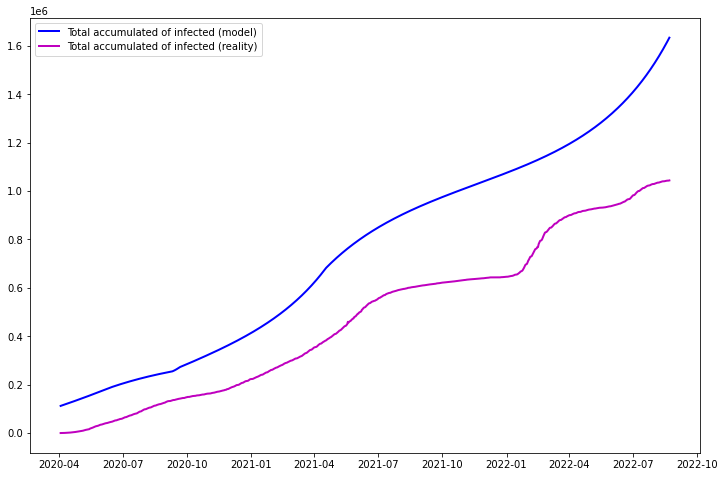

In [ ]:
# Graphically representing the total accumulated of infected and comparing with reality
fig, ax = plt.subplots()
ax.xaxis_date()
fig.set_figwidth(12)
fig.set_figheight(8)

plt.plot(dates_covid19_dataset, (X + R + I),'b', lw=2, label = 'Total accumulated of infected (model)')
plt.plot(dates_covid19_dataset, totalOfInfecteds,'m', lw=2, label = 'Total accumulated of infected (reality)')
plt.legend()
plt.show()

## Conclusion

By the analysis of the graphics, we can notice that without vaccination we have a higher number of infected. Our model still need some improvements, specially the data about the vaccine which are not updated (we had some hardships to find updated data). The model also have some limitations: as every model, we are not considering different variations of the virus which would interfere in the vaccine effectiveness through time, we are also considering that every single person has the same recovery time, which in the real worl is not true, as other limitations.

In the future, we plan to compare more both of our model to extract some data and have more precise conclusions, and search for more updated data, maybe trying to gather it from different sources.